# Part I - (Ford GoBike-Tripdata)
## by (Aminat Owodunni)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Load dataset
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Check structure of dataset
df.shape

(183412, 16)

In [4]:
#Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> There are 183,412 columns in the dataset with 16 features (```duration_sec```, ```start_time```, ```end_time```, ```start_station_id```, ```start_station_name```, ```start_station_latitude```, ```start_station_longitude```, ```end_station_id```, ```end_station_name```, ```end_station_latitude```, ```end_station_longitude```, ```bike_id```, ```user_type```, ```member_birth_year```, ```member_gender```, ```bike_share_for_all_trip```). Most variables are string in nature, but the variables ```user_type``` and ```member_gender``` are categorical features.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the what time of the day trips are taken, and the relationship between trip duration, user type and time of the day the trip is taken.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the duration of trip will depend on what time of day the trip the taken and user type. i also expect that weekend trips will take longer duration.

# Data Wragling

In [5]:
#Check null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check duplicated values
df.duplicated().any()

False

In [7]:
# Drop rows with null values
df.dropna(inplace=True)

In [8]:
# Recheck null values
df.isnull().sum().any()

False

In [9]:
# Create Age column
df['age'] = df['member_birth_year'].apply(lambda x: 2019 - x)

# Create duration in minute column
df['duration_min'] = df['duration_sec']/60

# Create columns date, time_of_day, day, month, hour, min, sec.
df[['date','time_of_the_day']] = df.start_time.str.split(expand=True)
df[['time_of_day','secs']] = df.time_of_the_day.str.split(".",expand=True)
df['day'] =pd.to_datetime(df['start_time']).dt.day_name()
df['month'] =pd.to_datetime(df['start_time']).dt.month_name()
df[['hour','min','sec']] = df.time_of_day.str.split(":",expand=True)

In [10]:
# define function to create session column
def part_of_day(h):
    return (
        "morning"
        if 5 <= h <= 11
        else "afternoon"
        if 12 <= h <= 17
        else "evening"
        if 18 <= h <= 22
        else "night"
    )
for hour in range(0, 24):
    part = part_of_day(hour)
    print(f"hour {hour} is {part}")

hour 0 is night
hour 1 is night
hour 2 is night
hour 3 is night
hour 4 is night
hour 5 is morning
hour 6 is morning
hour 7 is morning
hour 8 is morning
hour 9 is morning
hour 10 is morning
hour 11 is morning
hour 12 is afternoon
hour 13 is afternoon
hour 14 is afternoon
hour 15 is afternoon
hour 16 is afternoon
hour 17 is afternoon
hour 18 is evening
hour 19 is evening
hour 20 is evening
hour 21 is evening
hour 22 is evening
hour 23 is night


In [11]:
# convert start_time column to datetime
df['start_time']= pd.to_datetime(df['start_time'])

In [12]:
# convert hour column to int data type
df['hour']= df['hour'].astype(int)

In [13]:
# apply part_of_day to hour column
df['session'] = df['hour'].apply(part_of_day)

In [14]:
# Drop unnecessary columns
df.drop(['time_of_the_day','secs','sec','min'],axis=1,inplace=True)

In [15]:
# checking dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,age,duration_min,date,time_of_day,day,month,hour,session
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,35.0,869.750000,2019-02-28,17:32:10,Thursday,February,17,afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,47.0,1030.900000,2019-02-28,12:13:13,Thursday,February,12,afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,30.0,608.166667,2019-02-28,17:54:26,Thursday,February,17,afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,45.0,26.416667,2019-02-28,23:54:18,Thursday,February,23,night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,60.0,29.883333,2019-02-28,23:49:58,Thursday,February,23,night


In [16]:
# convert bike_id column to string data type
# convert user_type column to category data type
# convert member_gender column to category data type

df['bike_id']= df['bike_id'].astype(str)
df['user_type']= df['user_type'].astype('category')
df['member_gender']= df['member_gender'].astype('category')
df['day']=df['day'].astype('category')
df['session']=df['session'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type            

# Exploratory Data Analysis

# Questions

1. What is the distribution of age of riders?
2. What is the most common rider's gender?
3. What is the most common user type?
4. What time of the day are the most trips taken?
5. What day of the week are the most trips taken?
6. How long does the average trip take?
7. Is there any relationship between trip duration and age?
8. Is there any relationship between trip duration and user type?
9. Is there any relationship between trip duration and time of day trip is taken?
10. How often does users go on trips during the weeks?
11. What are the number of users by gender?
12. Are trips taken at a particular time of the day during weekdays and weekends?
13. Does the weekday trips duration depends on whether the user is a subcriber or customer?
14. What is the amount of time spent per day per user type?
15. Does the Trips duration depends on gender of the user?

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of age of riders year?


**1. What is the distribution of age of riders?**

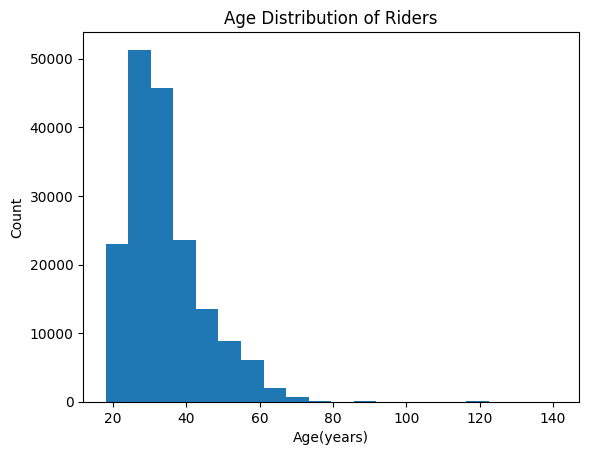

In [18]:
# Investigating age distribution of members
plt.hist(data=df,x='age',bins=20)
plt.xlabel('Age(years)')
plt.ylabel('Count')
plt.title('Age Distribution of Riders')
plt.show()

The Distribution is skewed to the right. Most of the riders are around 30 years old. Even though there are some riders ages older than 90 years old looks like high outliers

**2. What is the most common rider's gender?**

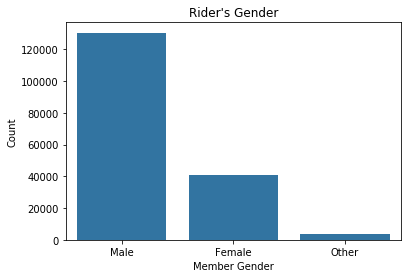

In [19]:
# Bar chart showing the gender count
base_color=sb.color_palette()[0]
freq=df['member_gender'].value_counts()
col_order=freq.index
sb.countplot(data=df,x='member_gender',color=base_color,order=col_order)
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title("Rider's Gender");

*The most common gender is Male*

**3. What is the most common user type?**

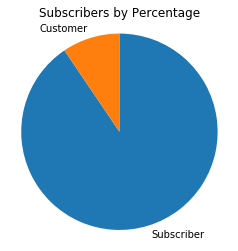

In [20]:
# Pie chart showing percentage of subcribers
sorted_counts=df['user_type'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False)
plt.axis('square')
plt.title('Subscribers by Percentage');

*The most common user type are subscribers*

**4. What time of the day are the most trips taken?**

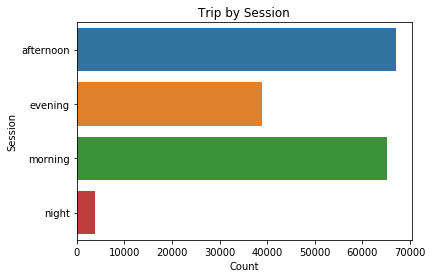

In [21]:
#Trip by session
session=df.session.value_counts(sort=False).index
sb.countplot(y='session',data=df,order=session)
plt.ylabel('Session')
plt.xlabel('Count')
plt.title("Trip by Session");

*Most trips are taken in the morning and afternoon*

**5. What day of the week are the most trips taken?**

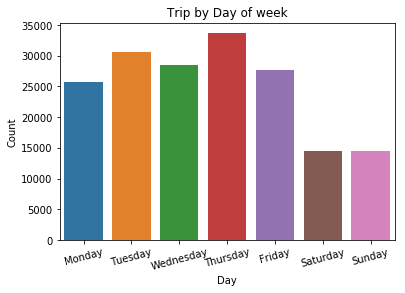

In [22]:
#Trip by session
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_name = pd.api.types.CategoricalDtype(categories=day, ordered=True)
df['day'] = df['day'].astype(day_name)
sb.countplot(x='day',data=df)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title("Trip by Day of week")
plt.xticks(rotation=15);

*Most trips are taken on Thursday*

**6. How long does the average trip take?**

In [23]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

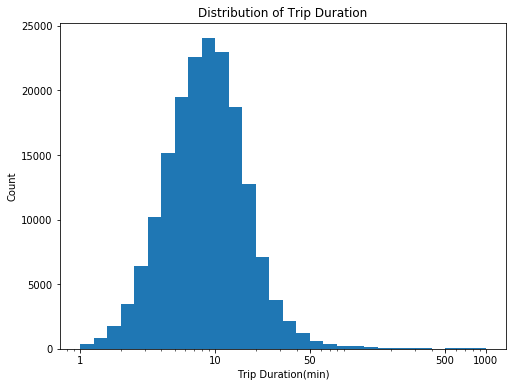

In [24]:
# Investigating distribution of trip duration
plt.figure(figsize=[8,6])
binedges = 10**np.arange(0 , 3+0.1 , 0.1)
plt.hist(data=df,x='duration_min',bins=binedges)
plt.xlabel('Trip Duration(min)')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([1, 1e1, 5e1, 5e2, 1e3], [1, '10', '50', '500', '1000'])
plt.title('Distribution of Trip Duration')
plt.show()

*The average trip takes 11 minutes. The longest trip took 1409 minutes. The Trip duration distribution graph is skewed to the left. We can interpret from the plot above that majority of the user use the bike for short time duration (usually 10mins)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> ```Member_birth_year``` and ```trip duration``` are both skewed distribution. There are no unusual points. There is need to transform the ```start_time``` column.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distribution. The ```start_time``` column was split into ```day```,```month``` and ```session```. The ```start_time``` column was split to determine when most trips are taken in terms of time of day and day of the week.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**7. Is there any relationship between trip duration and age?**

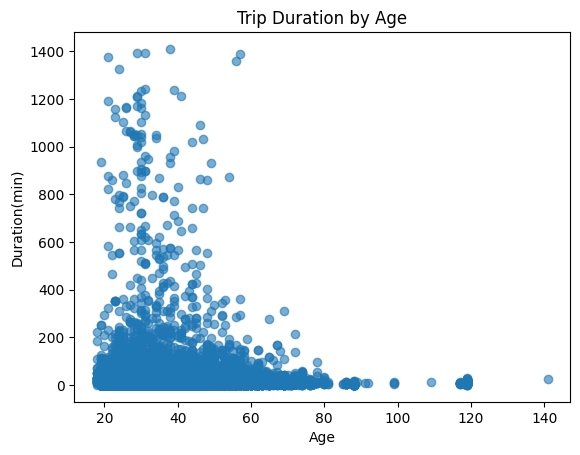

In [19]:
# Plot of Trip Duration by Member Birth Year
plt.scatter(data=df,x='age',y='duration_min',alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Duration(min)')
plt.title('Trip Duration by Age');

*It can be seen that younger members have a longer trip duration*

**8. Is there any relationship between trip duration and user type?**

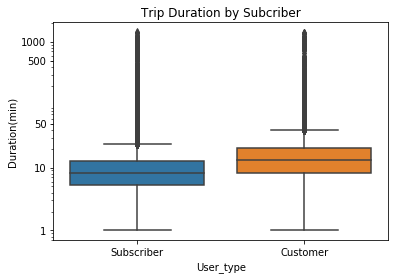

In [26]:
#Trip duration by user
user=['Subscriber','Customer']
user_type=pd.api.types.CategoricalDtype(ordered=True,categories=user)
df['user_type']=df['user_type'].astype(user_type)
sb.boxplot(data=df,x='user_type',y='duration_min')
plt.yscale('log')
plt.yticks([1, 1e1, 5e1, 5e2, 1e3], [1, '10', '50', '500', '1000'])
plt.xlabel('User_type')
plt.ylabel('Duration(min)')
plt.title('Trip Duration by Subcriber');

*Customers have a longer duration trip than subscribers*

**9. Is there any relationship between trip duration and time of day trip is taken?**

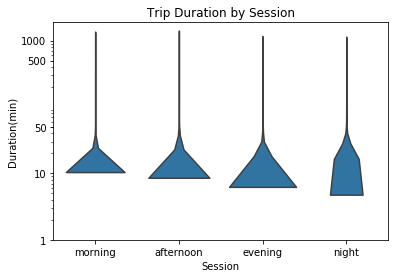

In [27]:
# Trip duration by session
base_color=sb.color_palette()[0]
session=['morning','afternoon','evening','night']
session_order=pd.api.types.CategoricalDtype(ordered=True,categories=session)
df['session']=df['session'].astype(session_order)
sb.violinplot(data=df,x='session',y='duration_min',color=base_color,inner=None)
plt.yscale('log')
plt.yticks([1, 1e1, 5e1, 5e2, 1e3], [1, '10', '50', '500', '1000'])
plt.xlabel('Session')
plt.ylabel('Duration(min)')
plt.title('Trip Duration by Session');

*Trips are longer when started in the afternoon and evening*

**10. How often does users go on trips during the Weekdays?**

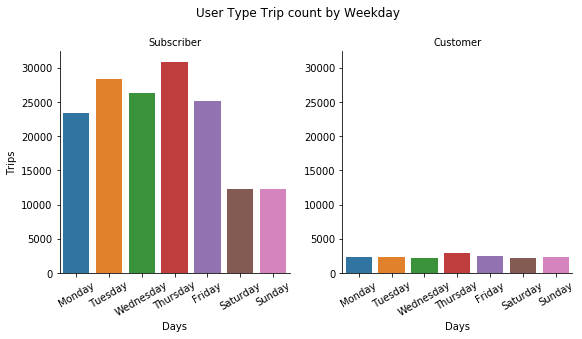

In [28]:
plt.figure(figsize = [10,8])
g=sb.factorplot(data=df, x='day', col="user_type", kind='count', sharey = True)
g.set_axis_labels("Days", "Trips");
g.set_titles("{col_name}");
g.fig.suptitle('User Type Trip count by Weekday', y=1.07, fontsize=12);
g.set_xticklabels(rotation=30);

*Subcribers usage is high on weekdays with Thursday being the highest usage. The customers highest usage is on Thursday*

**11. What are the number of users by gender?**

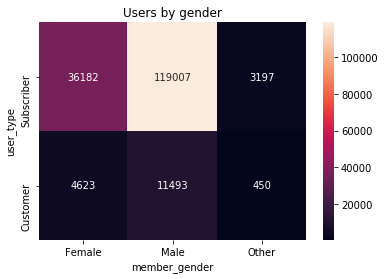

In [29]:
# Number of users by gender
user_gender=df.groupby(['user_type','member_gender']).size()
user_gender=user_gender.reset_index(name='count')
user_gender=user_gender.pivot(index='user_type',columns='member_gender',values='count')
sb.heatmap(user_gender,annot=True,fmt='d')
plt.title('Users by gender');

*Males users are more than the other gender for both users_type*

**12. Are trips taken at a particular time of the day during weekdays and weekends?**

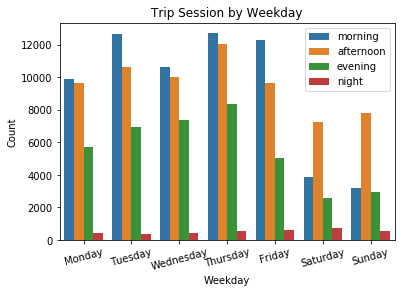

In [30]:
sb.countplot(data=df,x='day',hue='session')
plt.legend()
plt.xticks(rotation=15)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Trip Session by Weekday');

*It can be observed that trips are taken in the morning on weekdays while trips are taken in the afternoon on weekends*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Users that are customers have a longer duration trip than subscribers.
   Subcribers usage is high on weekdays with Thursday being the highest usage while the customers highest usage is on Thursday.
  It can be observed that trips are taken in the morning on weekdays while trips are taken in the afternoon on weekends
  It is also seen that males subcribers are more than the other gender for both users_type.
  



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The scatter plot shows that younger members have a longer trip duration.
  The trips are generally longer when started in the afternoon and evening.
 

# Multivariate Exploration

**13. Does the weekday trips duration depends on whether the user is a subcriber or customer?**

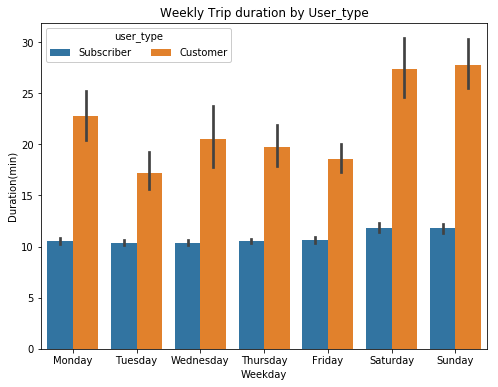

In [31]:
# User_type Trip Duration by Day of week
plt.figure(figsize=[8,6])
ax=sb.barplot(data=df,x='day',y='duration_min',hue='user_type')
ax.legend(loc='upper left',ncol=3,framealpha=1,title='user_type')
plt.title('Weekly Trip duration by User_type')
plt.xlabel('Weekday')
plt.ylabel('Duration(min)');

*Both subscribers and customers have longer trips on weekends*

**14. What is the amount of time spent per day per user type?**

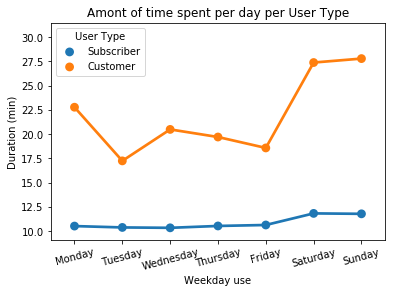

In [32]:
# plot the point plot of time spent by user type
sb.pointplot(data=df, x='day', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Weekday use')
plt.ylabel('Duration (min)')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type')
plt.xticks(rotation=15);

*Customers spend more time than the subscribers. However both users spend more time on weekends*

**15. Does the Trips duration depends on gender of the user?**

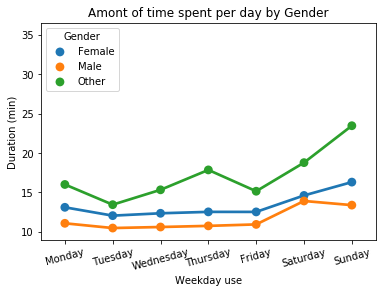

In [33]:
sb.pointplot(data=df, x='day', y='duration_min', hue='member_gender', errwidth=0)
plt.xlabel('Weekday use')
plt.ylabel('Duration (min)')
plt.title('Amont of time spent per day by Gender')
plt.legend(title='Gender')
plt.xticks(rotation=15);

The pointplot above depicts that the female spend longer time on trips than male, while the other gender spends the most time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers spend more time than the subscribers. However both users spend more time on weekends


### Were there any interesting or surprising interactions between features?

> The pointplot depicts that the female spend longer time on trips than male, while the other gender spends the most time.

## Conclusions
>The ```start_time``` column was split to determine when most trips are taken in terms of time of day and day of the week. ```duration_min``` column was created to convert trip duration from seconds to minute.

>Majority of the users use the bike for short time duration (usually 10mins).
Younger members have a longer trip duration.
Most common user type are subscribers.
Male users are more than the other gender for both users_type. 
Users that are customers have a longer duration trip than subscribers, however both users spend more time on weekends. Subcribers usage is high on weekdays with Thursday being the highest usage while the customers highest usage is on Thursday.
It can be observed that trips are taken in the morning on weekdays while trips are taken in the afternoon on weekends.
Most trips are taken in the morning and afternoon, however, the trips are longer when started in the afternoon and evening.